Ryan: (maf) set to 0.05, minimum minor allele count (mac) set to
10, and minimum locus coverage (max-missing) set to 0.1. Only SNPs called in 100% of individuals; 2) SNPs with observed heterozygosity larger than 0.6 were removed to avoid paralogous loci in the dataset (Li et al.,
2014); 3) SNPs deviating from Hardy-Weinberg equilibrium (HWE, p-value < 0.01) in more
than one population were removed; 4) SNP pairs that showed linkage disequilibrium (LD) with r2> 0.2 were pruned

Bradburn: Call rates > 0.85, maf > 0.01 (or 0.05 in a pop)

In [1]:
vcf = "./maf05mac10het8m3R5r5_2/populations.snps.vcf"
suffix = "./maf05mac10het8m3R5r5_2/Making/"

In [2]:
%expand
module load vcftools/v0.1.17

vcftools --vcf {vcf} --recode --recode-INFO-all \
--min-alleles 2 \
--max-missing 0.90 \
--out {suffix}m90


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac10het8m3R5r5_2/populations.snps.vcf
	--recode-INFO-all
	--min-alleles 2
	--max-missing 0.9
	--out ./maf05mac10het8m3R5r5_2/Making/m90
	--recode

After filtering, kept 144 out of 144 Individuals
Outputting VCF file...
After filtering, kept 12321 out of a possible 27568 Sites
Run Time = 11.00 seconds


In [3]:
%expand
vcftools --vcf {suffix}m90.recode.vcf --missing-indv --out {suffix}m90


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac10het8m3R5r5_2/Making/m90.recode.vcf
	--missing-indv
	--out ./maf05mac10het8m3R5r5_2/Making/m90

After filtering, kept 144 out of 144 Individuals
Outputting Individual Missingness
After filtering, kept 12321 out of a possible 12321 Sites
Run Time = 1.00 seconds


In [4]:
%expand
cat {suffix}m90.imiss

INDV	N_DATA	N_GENOTYPES_FILTERED	N_MISS	F_MISS
ALL02	12321	0	284	0.0230501
ALL03	12321	0	3133	0.254281
ALL04	12321	0	155	0.0125801
ALL05	12321	0	239	0.0193978
ALL06	12321	0	303	0.0245922
ALL11	12321	0	60	0.00486973
ALL12	12321	0	130	0.0105511
ALLATOONA01	12321	0	140	0.0113627
ALLATOONA10	12321	0	191	0.015502
CANOT11829	12321	0	1097	0.089035
CANOT_11830	12321	0	205	0.0166383
CANOT_11832	12321	0	103	0.00835971
CANOT11837	12321	0	644	0.0522685
CANOT11838	12321	0	125	0.0101453
CANOT_2617	12321	0	394	0.0319779
DB12041	12321	0	2168	0.17596
DB2589	12321	0	723	0.0586803
DB2590	12321	0	128	0.0103888
DB_2592	12321	0	141	0.0114439
DB_2593	12321	0	1417	0.115007
DB2634	12321	0	721	0.058518
DB2635	12321	0	317	0.0257284
DB_2637	12321	0	64	0.00519438
FL01	12321	0	616	0.0499959
FL09	12321	0	791	0.0641993
FL12	12321	0	148	0.012012
FL15	12321	0	173	0.0140411
FL16	12321	0	187	0.0151773
FL20	12321	0	114	0.0092525
FL21	12321	0	240	0.0194789
FL23	12321	0	369	0.0299489
FL30	12321	0	113	0.00917133
FL55	12321	0

In [5]:
%expand
module load vcftools/v0.1.17
## Filtering out loci that depart HWE in at least 2 populations with a p-value cutoff of 0.05

../../../Scripts/filter_hwe_by_pop.pl -v {suffix}m90.recode.vcf \
-p ./NFLDB.location -h 0.05 -c 0.08 -o {suffix}m90-hwPbi

mv exclude.hwe exclude.txt
## remove intermediate files
rm *.inds
## Remove these if you don't want to inspect HWE results
rm *.hwe

Processing population: Big_Bayou_Canot (6 inds)
Processing population: DOlive_Bay (8 inds)
Processing population: FL_ASF (7 inds)
Processing population: FL_Bass_Cons (5 inds)
Processing population: Lake_Allatoona1 (5 inds)
Processing population: Lake_Allatoona2 (4 inds)
Processing population: Lake_Guntersville (10 inds)
Processing population: Lake_Harding (5 inds)
Processing population: Lake_Mattoon (10 inds)
Processing population: Lake_Otter (10 inds)
Processing population: Lamar_County_Lake (1 inds)
Processing population: Lay_Lake (9 inds)
Processing population: Mill_Creek (3 inds)
Processing population: Northern_ASF (6 inds)
Processing population: Reelfoot (4 inds)
Processing population: Reeves_Branch (5 inds)
Processing population: Rocky_Mt_PFA (5 inds)
Processing population: Sipsey_River (13 inds)
Processing population: St_Johns_River (17 inds)
Processing population: Sugar_Lake (9 inds)
Processing population: Tensaw_Lake (2 inds)
Outputting results of HWE test for filtered loci to

## All filtered SNPs (unlinked)

In [6]:
%expand
module load tabix/0.2.6
module load samtools/1.6
module load bcftools/1.3.2

cp {suffix}m90-hwPbi.recode.vcf {suffix}m90-hwPbicp.recode.vcf
vcf-sort {suffix}m90-hwPbicp.recode.vcf > {suffix}m90-hwPbicp.sorted.vcf
bgzip {suffix}m90-hwPbicp.sorted.vcf
tabix -p vcf {suffix}m90-hwPbicp.sorted.vcf.gz

sort -k1,1d -k2,2n


In [7]:
%expand
module load bcftools/1.3.2

bcftools +prune {suffix}m90-hwPbicp.sorted.vcf.gz -l 0.2 -n 1 -w 1000 \
-Ov -o {suffix}m90-hwPbi-thinned.vcf
grep -v "#" {suffix}m90-hwPbi-thinned.vcf | wc -l

7285


In [8]:
getwd()

[1] "/gpfs01/home/kes0132/Delta/Stacks_Assembly/MyStacks"

In [9]:
library(radiator)

In [10]:
%expand
setwd("{suffix}")

Execution date@time: 20191010@1211
Folder created: read_vcf_20191010@1211
Function call and arguments stored in: radiator_read_vcf_args_20191010@1211.tsv
File written: random.seed (790815)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 7285
done! timing: 16 sec


File written: radiator_20191010@1211.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20191010@1211.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20191010@1211
Function call and arguments stored in: radiator_filter_monomorphic_args_20191010@1211.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20191010@1211.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 7285 / 7285
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 7285 / 7285

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################



Preparing output files...
File written: whitelist.markers.tsv
Writing the filtered strata: strata.filtered.tsvstrata.filtered.tsv

Generating statistics after filtering
Generating individual stats...


[==================================================] 100%, completed in 0s


File written: individuals qc info and stats summary
File written: individuals qc plot
Generating markers stats...


[==================================================] 100%, completed in 0s
[==================================================] 100%, completed in 0s
################################### SUMMARY ####################################




Summary (AFTER filtering):
Missing data: 
    markers: 0.04
    individuals: 0.04


Coverage info:
    individuals mean read depth: 85699
    individuals mean genotype coverage: 12
    markers mean coverage: 12


Number of chromosome/contig/scaffold: 1
Number of locus: 7285
Number of markers: 7285
Number of populations: 4
Number of individuals: 144

Number of ind/pop:
NB = 42
DB = 29
FL = 29
ILMB = 44

Number of duplicate id: 0
radiator Genomic Data Structure (GDS) file: radiator_20191010@1211.gds

Computation time, overall: 41 sec


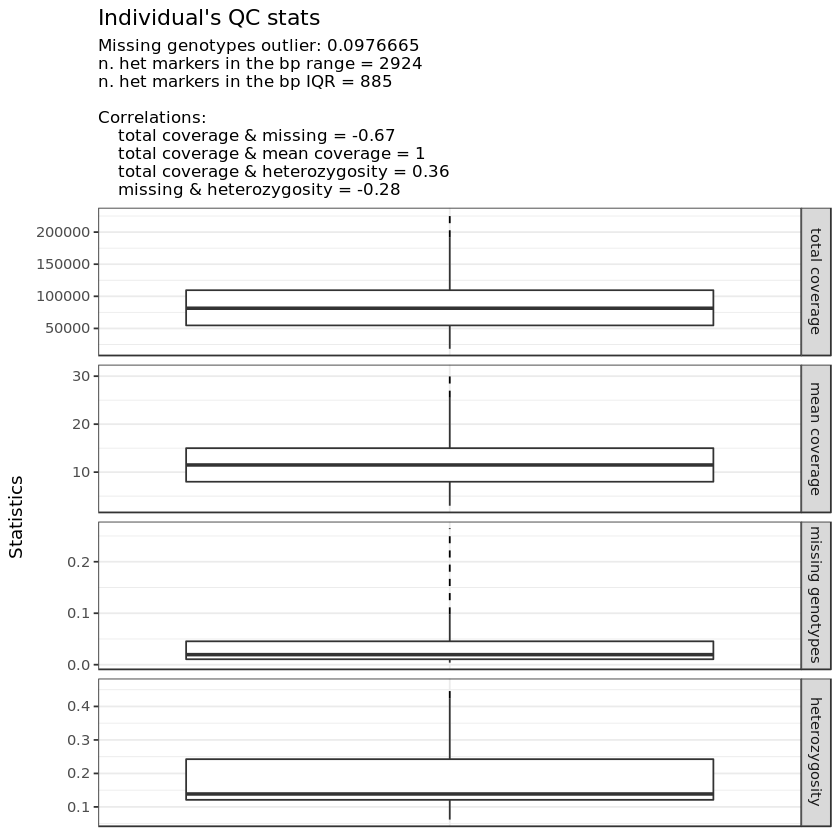

############################## completed read_vcf ##############################


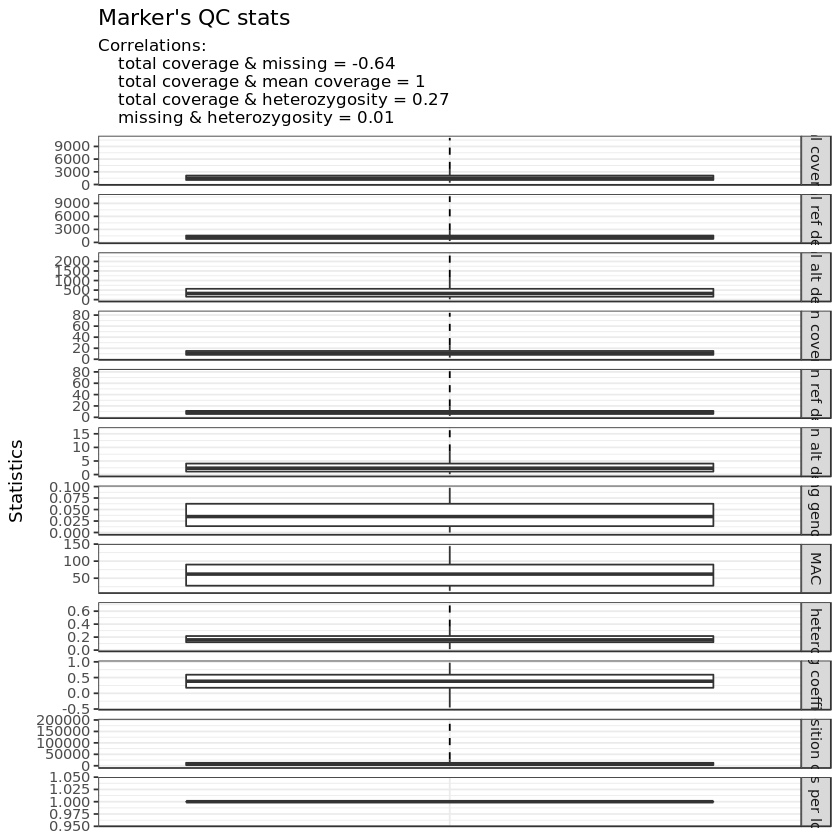

In [12]:
%expand
data = read_vcf("m90-hwPbi-thinned.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, parallel.core = 1, filter.common.markers = F,pop.levels=c("NB","DB","FL","ILMB"),
               path.folder="allfilt_radiator")


In [13]:
outs = genomic_converter(data, strata="../../NFLDB.strata", 
                  output = c("genind","structure"),
                 parallel.core = 4, filename = "P3-allfiltu", pop.levels=c("NB","DB","FL","ILMB"), 
                         path.folder="allfilt_radiator")

################################################################################
########################## radiator::genomic_converter #########################
################################################################################


Execution date@time: 20191010@1212

Deprecated arguments identified inside "...": 
    pop.levels

Read documentation, for latest changes, and modify your codes!

Folder created: 02_radiator_genomic_converter_20191010@1212
Function call and arguments stored in: radiator_genomic_converter_args_20191010@1212.tsv
Filters parameters file generated: filters_parameters_20191010@1212.tsv

Importing data

Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144

Writing tidy data set:
P3-allfiltu.rad

Preparing data for output

Data is bi-allelic
Calibrating REF/ALT alleles...
    number of REF/ALT switch = 3
Generating structure file
Generating adegenet genind object


################################### RESULTS ####################################


Data format of input: SeqVarGDSClass
Biallelic data
Number of markers: 7285
Number of chromosome/contig/scaffold: 1
Number of strata: 4
Number of individuals: 144

Computation time, overall: 282 sec


######################### genomic_converter completed ##########################


In [14]:
outs$genind

/// GENIND OBJECT /////////

 // 144 individuals; 7,285 loci; 14,570 alleles; size: 12.2 Mb

 // Basic content
   @tab:  144 x 14570 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 14570 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input, write = TRUE)

 // Optional content
   @pop: population of each individual (group size range: 29-44)
   @strata: a data frame with 2 columns ( INDIVIDUALS, POP_ID )

In [15]:
allfiltu = outs$genind
save(allfiltu, file="P3-allfiltu.genind")

## Fixed within at least 2 pops

In [16]:
import pandas as pd
infile ="./maf05mac10het8m3R5r5_2/populations.sumstats.tsv"

IN = pd.read_table(infile,header=4)

In [17]:
fixed = IN[(IN['P'] >0.98) & (IN['Pop ID'] != "ILMB")]

In [19]:
check = []
for row in fixed.itertuples(index=True):
    if (row._1,row.Chr,row.BP) not in check:
        check.append((row._1,row.Chr,row.BP))

x = IN[IN[["# Locus ID","Chr","BP"]].apply(tuple, 1).isin(check)]
x = x[(x['Pop ID'] == "DB") | (x['Pop ID'] == "NB")| (x['Pop ID'] == "FL")]   



In [20]:
x

,# Locus ID,Chr,BP,Col,Pop ID,P Nuc,Q Nuc,N,P,Obs Het,...,Exp Het,Exp Hom,Pi,Smoothed Pi,Smoothed Pi P-value,Fis,Smoothed Fis,Smoothed Fis P-value,HWE P-value,Private
4,178,18,2739,90,DB,A,G,29,0.948276,0.10345,...,0.09810,0.90190,0.09982,0.00044,0.0,-0.03636,-0.03636,0.0,1.0000,0
5,178,18,2739,90,FL,A,-,29,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.0000,0
6,178,18,2739,90,NB,A,G,38,0.039474,0.07895,...,0.07583,0.92417,0.07684,0.00030,0.0,-0.02740,-0.02740,0.0,1.0000,0
8,179,18,2739,30,DB,T,C,28,0.964286,0.07143,...,0.06888,0.93112,0.07013,0.00000,0.0,-0.01852,0.00000,0.0,1.0000,0
9,179,18,2739,30,FL,T,-,28,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148163,474581,250036,41435,48,FL,C,-,29,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.0000,0
148164,474581,250036,41435,48,NB,C,T,42,0.202381,0.30952,...,0.32285,0.67715,0.32674,0.00067,0.0,0.05268,0.05268,0.0,0.6583,0
148166,474584,250036,41435,31,DB,G,A,29,0.965517,0.06897,...,0.06659,0.93341,0.06776,0.00000,0.0,-0.01786,0.00000,0.0,1.0000,0
148167,474584,250036,41435,31,FL,G,-,29,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.0000,0


In [21]:
check =[]
goodLoc = []
for row in x.itertuples(index=True):
    if row.P < 0.02:
        if (row._1,row.Chr,row.BP) not in check:
            check.append((row._1,row.Chr,row.BP))
            if (row.Chr,row.BP) not in goodLoc:
                goodLoc.append((row.Chr,row.BP))

In [22]:
y = IN[IN[["Chr","BP"]].apply(tuple, 1).isin(goodLoc)]

In [23]:
y.iloc[0:15]

,# Locus ID,Chr,BP,Col,Pop ID,P Nuc,Q Nuc,N,P,Obs Het,...,Exp Het,Exp Hom,Pi,Smoothed Pi,Smoothed Pi P-value,Fis,Smoothed Fis,Smoothed Fis P-value,HWE P-value,Private
60,298,28,22314,34,ILMB,G,A,43,0.662791,0.39535,...,0.44700,0.55300,0.45226,0.00947,0.0,0.12583,0.05979,0.0,0.49746,0
61,298,28,22314,34,DB,G,A,29,0.810345,0.31034,...,0.30737,0.69263,0.31276,0.00579,0.0,0.00774,-0.02774,0.0,1.00000,0
62,298,28,22314,34,FL,G,-,28,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
63,298,28,22314,34,NB,-,A,40,0.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
115,415,36,33628,35,ILMB,A,G,41,0.536585,0.43902,...,0.49732,0.50268,0.50346,0.00098,0.0,0.12799,0.12799,0.0,0.53055,0
116,415,36,33628,35,DB,A,G,28,0.964286,0.07143,...,0.06888,0.93112,0.07013,0.00014,0.0,-0.01852,-0.01852,0.0,1.00000,0
117,415,36,33628,35,FL,-,G,27,0.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
118,415,36,33628,35,NB,A,-,39,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
123,436,38,5204,61,ILMB,G,C,43,0.848837,0.20930,...,0.25663,0.74337,0.25964,0.00139,0.0,0.19389,0.19389,0.0,0.22263,0
124,436,38,5204,61,DB,G,-,26,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0


In [24]:
len(goodLoc)

3980

In [26]:
%expand
positions = []
OUT = open("{suffix}fixed2_98.positions","w")
OUTr = open("{suffix}fixed2_98R.positions","w")
OUTr.write("LOCUS\tPOS\n")
n=0
for row in y.itertuples(index=True):
    if (row.Chr, row.BP) not in positions:
        positions.append((row.Chr, row.BP))
        OUT.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        OUTr.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        n+=1
OUT.close()
OUTr.close()
print(n)

3980


In [27]:
%expand
module load vcftools/v0.1.17

vcftools --vcf {suffix}m90-hwPbi.recode.vcf --recode \
--recode-INFO-all --positions {suffix}fixed2_98.positions \
--out {suffix}m90-hwPBi-fixed2_98


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac10het8m3R5r5_2/Making/m90-hwPbi.recode.vcf
	--recode-INFO-all
	--out ./maf05mac10het8m3R5r5_2/Making/m90-hwPBi-fixed2_98
	--positions ./maf05mac10het8m3R5r5_2/Making/fixed2_98.positions
	--recode

After filtering, kept 144 out of 144 Individuals
Outputting VCF file...
After filtering, kept 1965 out of a possible 12162 Sites
Run Time = 2.00 seconds


Execution date@time: 20191010@1141
Folder created: read_vcf_20191010@1141
Function call and arguments stored in: radiator_read_vcf_args_20191010@1141.tsv
File written: random.seed (716045)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 2435
done! timing: 2 sec


File written: radiator_20191010@1141.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20191010@1141.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20191010@1141
Function call and arguments stored in: radiator_filter_monomorphic_args_20191010@1141.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20191010@1141.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 1917 / 2435
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 1917 / 2435

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################



Preparing output files...
File written: whitelist.markers.tsv
Writing the filtered strata: strata.filtered.tsvstrata.filtered.tsv

Generating statistics after filtering
Generating individual stats...
File written: individuals qc info and stats summary
File written: individuals qc plot
Generating markers stats...


################################### SUMMARY ####################################




Summary (AFTER filtering):
Missing data: 
    markers: 0.05
    individuals: 0.05


Coverage info:
    individuals mean read depth: 25962
    individuals mean genotype coverage: 11
    markers mean coverage: 11


Number of chromosome/contig/scaffold: 1
Number of locus: 1917
Number of markers: 2435
Number of populations: 4
Number of individuals: 144

Number of ind/pop:
ILMB = 44
DB = 29
FL = 29
NB = 42

Number of duplicate id: 0
radiator Genomic Data Structure (GDS) file: radiator_20191010@1141.gds

Computation time, overall: 8 sec


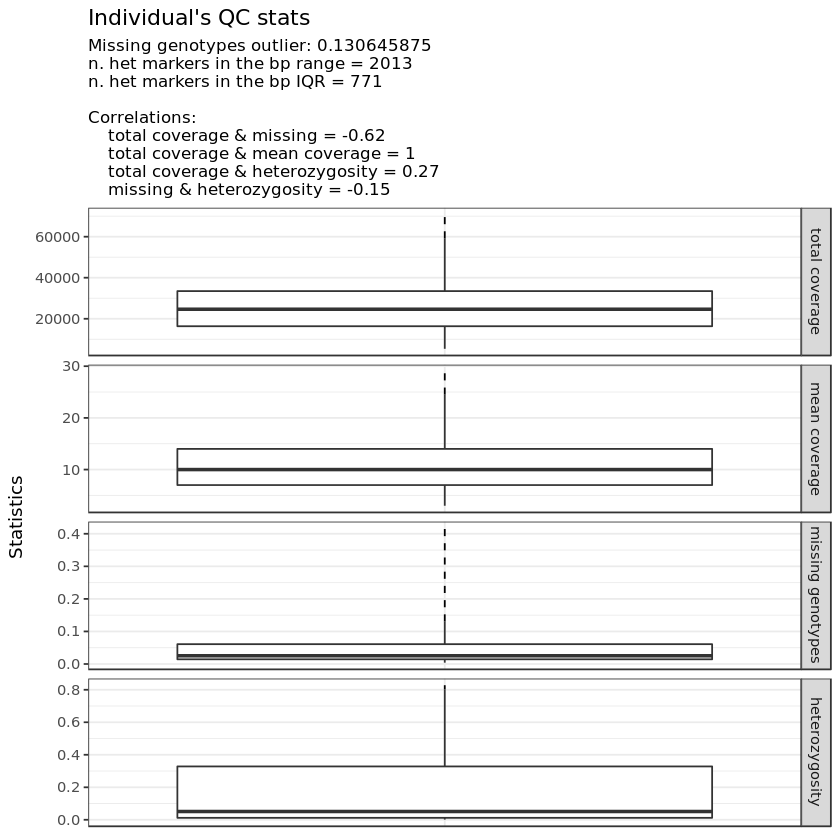

############################## completed read_vcf ##############################


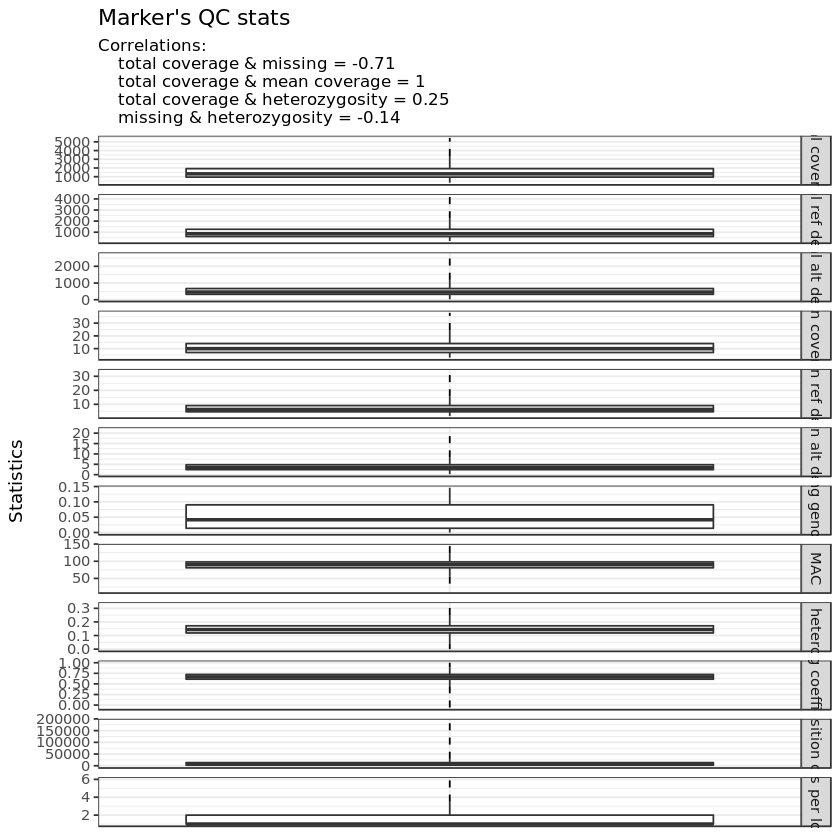

In [226]:
%expand
data = read_vcf("m85-hwPBi-fixed2_98.recode.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, parallel.core = 4, filter.common.markers = F)


In [ ]:
#dataLD = filter_ld(data, interactive.filter = F, filter.short.ld = "mac",
#  filter.long.ld = 0.7, parallel.core = 4, long.ld.missing = TRUE,
#  filename = "filtered_hwld")

In [ ]:
genomic_converter(dataLD, strata="../../NFLDB.strata", 
                  output = c("genind","structure","vcf"),
                 parallel.core = 4, filename = "hwp3t1ld7")

In [28]:
%expand
module load tabix/0.2.6
module load samtools/1.6

bgzip {suffix}m90-hwPBi-fixed2_98.recode.vcf 
tabix -p vcf {suffix}m90-hwPBi-fixed2_98.recode.vcf.gz

In [29]:
%expand
module load bcftools/1.3.2

bcftools +prune {suffix}m90-hwPBi-fixed2_98.recode.vcf.gz -l 0.2 -n 1 -w 10000 \
-Ov -o {suffix}m90-hwPBi-fixed2_98-thinned.vcf
grep -v "#" {suffix}m90-hwPBi-fixed2_98-thinned.vcf | wc -l

1578


Execution date@time: 20191010@1225
Folder created: read_vcf_20191010@1225
Function call and arguments stored in: radiator_read_vcf_args_20191010@1225.tsv
File written: random.seed (398450)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 1578
done! timing: 2 sec


File written: radiator_20191010@1225.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20191010@1225.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20191010@1225
Function call and arguments stored in: radiator_filter_monomorphic_args_20191010@1225.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20191010@1225.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 1578 / 1578
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 1578 / 1578

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################



Preparing output files...
File written: whitelist.markers.tsv
Writing the filtered strata: strata.filtered.tsvstrata.filtered.tsv

Generating statistics after filtering
Generating individual stats...
File written: individuals qc info and stats summary
File written: individuals qc plot
Generating markers stats...


################################### SUMMARY ####################################




Summary (AFTER filtering):
Missing data: 
    markers: 0.04
    individuals: 0.04


Coverage info:
    individuals mean read depth: 18661
    individuals mean genotype coverage: 12
    markers mean coverage: 12


Number of chromosome/contig/scaffold: 1
Number of locus: 1578
Number of markers: 1578
Number of populations: 4
Number of individuals: 144

Number of ind/pop:
NB = 42
DB = 29
FL = 29
ILMB = 44

Number of duplicate id: 0
radiator Genomic Data Structure (GDS) file: radiator_20191010@1225.gds

Computation time, overall: 8 sec


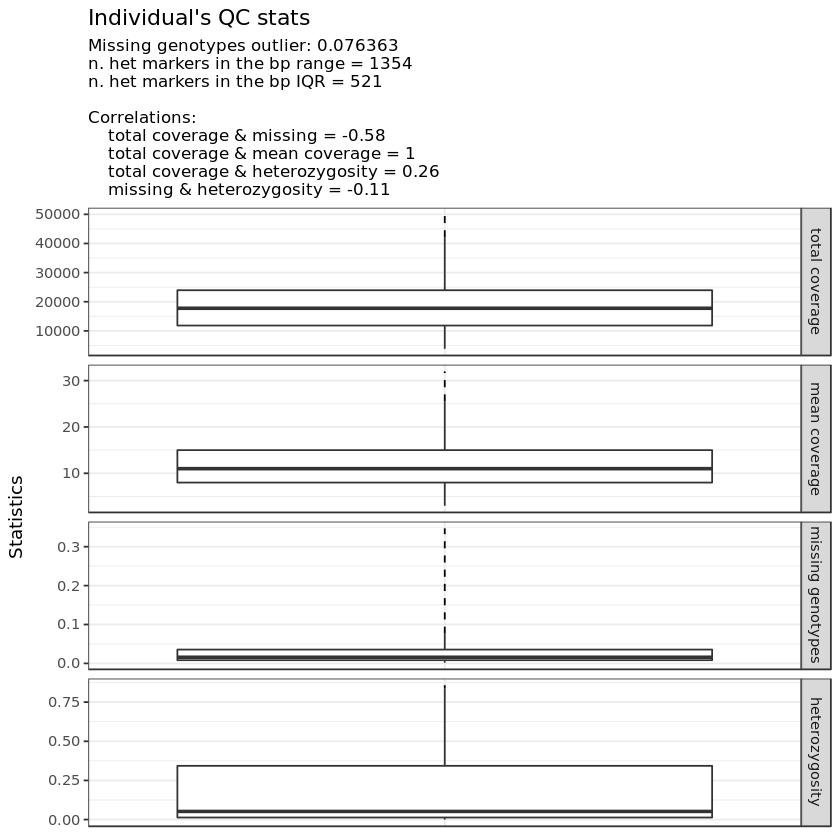

############################## completed read_vcf ##############################


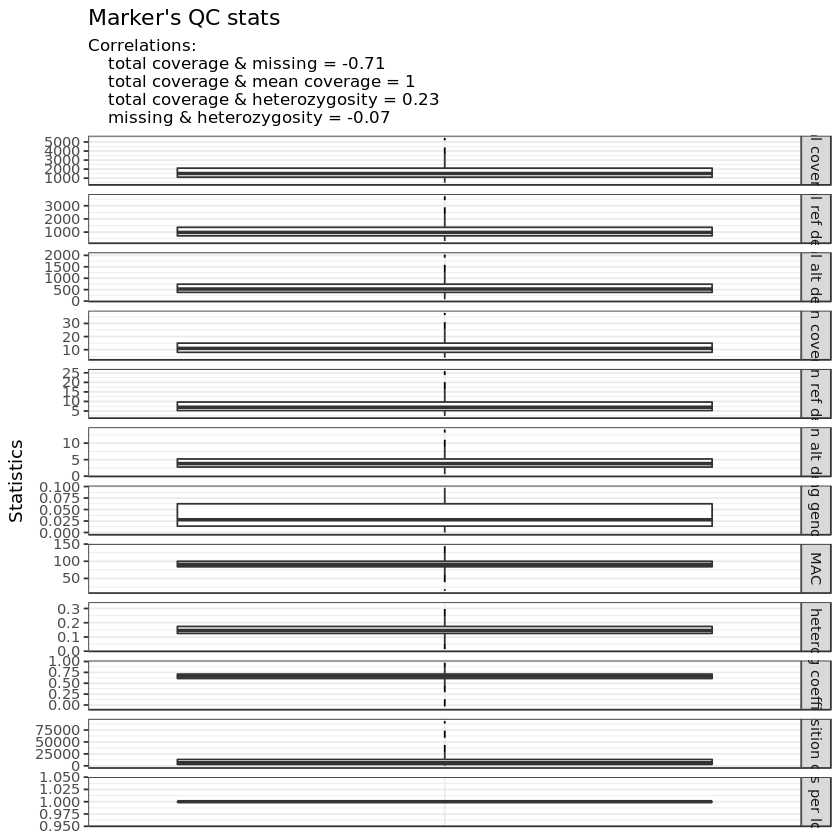

In [30]:
data = read_vcf("m90-hwPBi-fixed2_98-thinned.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, parallel.core = 4, filter.common.markers = F,pop.levels=c("NB","DB","FL","ILMB"),
               path.folder="fixed2u_radiator")


In [31]:
outs = genomic_converter(data, strata="../../NFLDB.strata", 
                  output = c("genind","structure"),
                 parallel.core = 4, filename = "P3-fixed2_98u",pop.levels=c("NB","DB","FL","ILMB"),
                         path.folder="fixed2u_radiator")

################################################################################
########################## radiator::genomic_converter #########################
################################################################################


Execution date@time: 20191010@1226

Deprecated arguments identified inside "...": 
    pop.levels

Read documentation, for latest changes, and modify your codes!

Folder created: 02_radiator_genomic_converter_20191010@1226
Function call and arguments stored in: radiator_genomic_converter_args_20191010@1226.tsv
Filters parameters file generated: filters_parameters_20191010@1226.tsv

Importing data

Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144

Writing tidy data set:
P3-fixed2_98u.rad

Preparing data for output

Data is bi-allelic
Calibrating REF/ALT alleles...
    number of REF/ALT switch = 1
Generating structure file
Generating adegenet genind object


################################### RESULTS ####################################


Data format of input: SeqVarGDSClass
Biallelic data
Number of markers: 1578
Number of chromosome/contig/scaffold: 1
Number of strata: 4
Number of individuals: 144

Computation time, overall: 7 sec


######################### genomic_converter completed ##########################


In [32]:
outs$genind

/// GENIND OBJECT /////////

 // 144 individuals; 1,578 loci; 3,156 alleles; size: 2.7 Mb

 // Basic content
   @tab:  144 x 3156 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 3156 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input, write = TRUE)

 // Optional content
   @pop: population of each individual (group size range: 29-44)
   @strata: a data frame with 2 columns ( INDIVIDUALS, POP_ID )

In [33]:
d = outs$genind
save(d, file="P3-fixed2_98u.genind")

## Fixed within individual pops

In [41]:
import pandas as pd
infile ="./maf05mac10het8m3R5r5_2/populations.sumstats.tsv"

IN = pd.read_table(infile,header=4)

In [141]:
IN.dtypes

# Locus ID                int64
Chr                       int64
BP                        int64
Col                       int64
Pop ID                   object
P Nuc                    object
Q Nuc                    object
N                         int64
P                       float64
Obs Het                 float64
Obs Hom                 float64
Exp Het                 float64
Exp Hom                 float64
Pi                      float64
Smoothed Pi             float64
Smoothed Pi P-value     float64
Fis                     float64
Smoothed Fis            float64
Smoothed Fis P-value    float64
HWE P-value             float64
Private                   int64
dtype: object

### fixed between DB and NB

In [42]:
# fixed between DB and NB
fixed = IN[(IN['P'] >0.98) & ((IN['Pop ID'] == "NB") | (IN['Pop ID'] == "DB"))]

In [43]:
check = []
for row in fixed.itertuples(index=True):
    if (row._1,row.Chr,row.BP) not in check:
        check.append((row._1,row.Chr,row.BP))

x = IN[IN[["# Locus ID","Chr","BP"]].apply(tuple, 1).isin(check)]
x = x[(x['Pop ID'] == "DB") | (x['Pop ID'] == "NB")]   



In [44]:
check =[]
goodLoc = []
for row in x.itertuples(index=True):
    if row.P < 0.02:
        if (row._1,row.Chr,row.BP) not in check:
            check.append((row._1,row.Chr,row.BP))
            if (row.Chr,row.BP) not in goodLoc:
                goodLoc.append((row.Chr,row.BP))

In [45]:
y = IN[IN[["Chr","BP"]].apply(tuple, 1).isin(goodLoc)]

In [46]:
y.iloc[0:15]

,# Locus ID,Chr,BP,Col,Pop ID,P Nuc,Q Nuc,N,P,Obs Het,...,Exp Het,Exp Hom,Pi,Smoothed Pi,Smoothed Pi P-value,Fis,Smoothed Fis,Smoothed Fis P-value,HWE P-value,Private
123,436,38,5204,61,ILMB,G,C,43,0.848837,0.20930,...,0.25663,0.74337,0.25964,0.00139,0.0,0.19389,0.19389,0.0,0.22263,0
124,436,38,5204,61,DB,G,-,26,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
125,436,38,5204,61,FL,G,-,27,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
126,436,38,5204,61,NB,G,C,30,0.016667,0.03333,...,0.03278,0.96722,0.03333,0.00013,0.0,-0.00000,-0.00000,0.0,1.00000,0
2273,8235,2000,3888,26,ILMB,G,C,44,0.761364,0.34091,...,0.36338,0.63662,0.36755,0.00257,0.0,0.07249,0.07249,0.0,0.68278,0
2274,8235,2000,3888,26,DB,G,C,28,0.982143,0.03571,...,0.03508,0.96492,0.03571,0.00024,0.0,-0.00000,-0.00000,0.0,1.00000,0
2275,8235,2000,3888,26,FL,G,-,29,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
2276,8235,2000,3888,26,NB,-,C,40,0.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
3254,11543,3604,274,13,ILMB,G,A,38,0.934211,0.02632,...,0.12292,0.87708,0.12456,0.00051,0.0,0.78873,0.78873,0.0,0.00274,0
3255,11543,3604,274,13,DB,-,A,17,0.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0


In [47]:
len(goodLoc)

98

In [48]:
%expand
positions = []
OUT = open("{suffix}fixedDBNB98.positions","w")
OUTr = open("{suffix}fixedDBNB98_R.positions","w")
OUTr.write("LOCUS\tPOS\n")
n=0
for row in y.itertuples(index=True):
    if (row.Chr, row.BP) not in positions:
        positions.append((row.Chr, row.BP))
        OUT.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        OUTr.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        n+=1
OUT.close()
OUTr.close()
print(n)

98


In [63]:
%expand
module load vcftools/v0.1.17

vcftools --vcf {suffix}m90-hwPBi-fixed2_98-thinned.vcf --recode \
--recode-INFO-all --positions {suffix}fixedDBNB98.positions \
--out {suffix}m90-hwPBi-fixed-thinned-DBNB98

#{suffix}m90-hwPbi.recode.vcf
    


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac10het8m3R5r5_2/Making/m90-hwPBi-fixed2_98-thinned.vcf
	--recode-INFO-all
	--out ./maf05mac10het8m3R5r5_2/Making/m90-hwPBi-fixed-thinned-DBNB98
	--positions ./maf05mac10het8m3R5r5_2/Making/fixedDBNB98.positions
	--recode

After filtering, kept 144 out of 144 Individuals
Outputting VCF file...
After filtering, kept 33 out of a possible 1578 Sites
Run Time = 1.00 seconds


In [64]:
%expand
module load vcftools/v0.1.17

vcftools --vcf {suffix}m90-hwPbi.recode.vcf --recode \
--recode-INFO-all --positions {suffix}fixedDBNB98.positions \
--out {suffix}m90-hwPBi-fixed-DBNB98

#


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac10het8m3R5r5_2/Making/m90-hwPbi.recode.vcf
	--recode-INFO-all
	--out ./maf05mac10het8m3R5r5_2/Making/m90-hwPBi-fixed-DBNB98
	--positions ./maf05mac10het8m3R5r5_2/Making/fixedDBNB98.positions
	--recode

After filtering, kept 144 out of 144 Individuals
Outputting VCF file...
After filtering, kept 46 out of a possible 12162 Sites
Run Time = 1.00 seconds


### fixed between DB and FL

In [49]:

fixed = IN[(IN['P'] >0.98) & ((IN['Pop ID'] == "FL") | (IN['Pop ID'] == "DB"))]

In [50]:
check = []
for row in fixed.itertuples(index=True):
    if (row._1,row.Chr,row.BP) not in check:
        check.append((row._1,row.Chr,row.BP))

x = IN[IN[["# Locus ID","Chr","BP"]].apply(tuple, 1).isin(check)]
x = x[(x['Pop ID'] == "DB") | (x['Pop ID'] == "FL")]   



In [51]:
check =[]
goodLoc = []
for row in x.itertuples(index=True):
    if row.P < 0.02:
        if (row._1,row.Chr,row.BP) not in check:
            check.append((row._1,row.Chr,row.BP))
            if (row.Chr,row.BP) not in goodLoc:
                goodLoc.append((row.Chr,row.BP))

In [52]:
y = IN[IN[["Chr","BP"]].apply(tuple, 1).isin(goodLoc)]

In [53]:
y.iloc[0:15]

,# Locus ID,Chr,BP,Col,Pop ID,P Nuc,Q Nuc,N,P,Obs Het,...,Exp Het,Exp Hom,Pi,Smoothed Pi,Smoothed Pi P-value,Fis,Smoothed Fis,Smoothed Fis P-value,HWE P-value,Private
197,829,81,7004,12,ILMB,C,T,43,0.662791,0.44186,...,0.44700,0.55300,0.45226,0.00264,0.0,0.02299,-0.10748,0.0,1.00000,0
198,829,81,7004,12,DB,-,T,29,0.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
199,829,81,7004,12,FL,C,-,28,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
200,829,81,7004,12,NB,C,T,42,0.666667,0.52381,...,0.44444,0.55556,0.44980,0.00122,0.0,-0.16454,-0.04145,0.0,0.32014,0
201,830,81,7004,68,ILMB,G,A,42,0.678571,0.40476,...,0.43622,0.56378,0.44148,0.00000,0.0,0.08317,0.00000,0.0,0.72382,0
202,830,81,7004,68,DB,-,A,29,0.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
203,830,81,7004,68,FL,G,-,29,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
204,830,81,7004,68,NB,G,A,41,0.682927,0.48780,...,0.43308,0.56692,0.43842,0.00000,0.0,-0.11264,0.00000,0.0,0.71700,0
313,1205,145,10612,69,ILMB,C,T,44,0.693182,0.38636,...,0.42536,0.57464,0.43025,0.00441,0.0,0.10200,0.05867,0.0,0.49884,0
314,1205,145,10612,69,DB,C,T,29,0.982759,0.03448,...,0.03389,0.96611,0.03448,0.00234,0.0,-0.00000,-0.03985,0.0,1.00000,0


In [54]:
len(goodLoc)

2278

In [55]:
%expand
positions = []
OUT = open("{suffix}fixedDBFL98.positions","w")
OUTr = open("{suffix}fixedDBFL98_R.positions","w")
OUTr.write("LOCUS\tPOS\n")
n=0
for row in y.itertuples(index=True):
    if (row.Chr, row.BP) not in positions:
        positions.append((row.Chr, row.BP))
        OUT.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        OUTr.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        n+=1
OUT.close()
OUTr.close()
print(n)

2278


### fixed between FL and NB

In [56]:

fixed = IN[(IN['P'] >0.98) & ((IN['Pop ID'] == "NB") | (IN['Pop ID'] == "FL"))]

In [57]:
check = []
for row in fixed.itertuples(index=True):
    if (row._1,row.Chr,row.BP) not in check:
        check.append((row._1,row.Chr,row.BP))

x = IN[IN[["# Locus ID","Chr","BP"]].apply(tuple, 1).isin(check)]
x = x[(x['Pop ID'] == "FL") | (x['Pop ID'] == "NB")]   



In [58]:
check =[]
goodLoc = []
for row in x.itertuples(index=True):
    if row.P < 0.02:
        if (row._1,row.Chr,row.BP) not in check:
            check.append((row._1,row.Chr,row.BP))
            if (row.Chr,row.BP) not in goodLoc:
                goodLoc.append((row.Chr,row.BP))

In [59]:
y = IN[IN[["Chr","BP"]].apply(tuple, 1).isin(goodLoc)]

In [60]:
y.iloc[0:15]

,# Locus ID,Chr,BP,Col,Pop ID,P Nuc,Q Nuc,N,P,Obs Het,...,Exp Het,Exp Hom,Pi,Smoothed Pi,Smoothed Pi P-value,Fis,Smoothed Fis,Smoothed Fis P-value,HWE P-value,Private
60,298,28,22314,34,ILMB,G,A,43,0.662791,0.39535,...,0.44700,0.55300,0.45226,0.00947,0.0,0.12583,0.05979,0.0,0.49746,0
61,298,28,22314,34,DB,G,A,29,0.810345,0.31034,...,0.30737,0.69263,0.31276,0.00579,0.0,0.00774,-0.02774,0.0,1.00000,0
62,298,28,22314,34,FL,G,-,28,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
63,298,28,22314,34,NB,-,A,40,0.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
115,415,36,33628,35,ILMB,A,G,41,0.536585,0.43902,...,0.49732,0.50268,0.50346,0.00098,0.0,0.12799,0.12799,0.0,0.53055,0
116,415,36,33628,35,DB,A,G,28,0.964286,0.07143,...,0.06888,0.93112,0.07013,0.00014,0.0,-0.01852,-0.01852,0.0,1.00000,0
117,415,36,33628,35,FL,-,G,27,0.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
118,415,36,33628,35,NB,A,-,39,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0
123,436,38,5204,61,ILMB,G,C,43,0.848837,0.20930,...,0.25663,0.74337,0.25964,0.00139,0.0,0.19389,0.19389,0.0,0.22263,0
124,436,38,5204,61,DB,G,-,26,1.000000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,1.00000,0


In [61]:
len(goodLoc)

3612

In [62]:
%expand
positions = []
OUT = open("{suffix}fixedFLNB98.positions","w")
OUTr = open("{suffix}fixedFLNB98_R.positions","w")
OUTr.write("LOCUS\tPOS\n")
n=0
for row in y.itertuples(index=True):
    if (row.Chr, row.BP) not in positions:
        positions.append((row.Chr, row.BP))
        OUT.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        OUTr.write(str(row.Chr)+"\t"+str(row.BP)+"\n")
        n+=1
OUT.close()
OUTr.close()
print(n)

3612


In [139]:
%expand
module load vcftools/v0.1.17

vcftools --vcf {suffix}m85-hwPbi.recode.vcf --recode \
--recode-INFO-all --positions {suffix}fixed2_97.positions \
--out {suffix}m85-hwPBi-fixed2_97


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac4het9m3R50_2/Making/m85-hwPbi.recode.vcf
	--recode-INFO-all
	--out ./maf05mac4het9m3R50_2/Making/m85-hwPBi-fixed2_97
	--positions ./maf05mac4het9m3R50_2/Making/fixed2_97.positions
	--recode

After filtering, kept 144 out of 144 Individuals
Outputting VCF file...
After filtering, kept 4090 out of a possible 15078 Sites
Run Time = 3.00 seconds


### Top markers based on PCA

In [46]:
%expand
module load vcftools/v0.1.17

vcftools --vcf {suffix}m85-hwPBi-fixed-thinned.vcf --recode \
--recode-INFO-all --positions {suffix}../Analysis/pc12_95.positions \
--out {suffix}../Analysis/pc12_95-fixed


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ./maf05mac4het9m3R50_2/Making/m85-hwPBi-fixed-thinned.vcf
	--recode-INFO-all
	--out ./maf05mac4het9m3R50_2/Making/../Analysis/pc12_95-fixed
	--positions ./maf05mac4het9m3R50_2/Making/../Analysis/pc12_95.positions
	--recode

After filtering, kept 144 out of 144 Individuals
Outputting VCF file...
After filtering, kept 218 out of a possible 2229 Sites
Run Time = 1.00 seconds


In [47]:
getwd()

[1] "/gpfs01/home/kes0132/Delta/Stacks_Assembly/MyStacks/maf05mac4het9m3R50_2/Making"

Execution date@time: 20191007@1133
Folder created: read_vcf_20191007@1133
Function call and arguments stored in: radiator_read_vcf_args_20191007@1133.tsv
File written: random.seed (542535)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 218
done! timing: 1 sec


File written: radiator_20191007@1133.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20191007@1133.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20191007@1133
Function call and arguments stored in: radiator_filter_monomorphic_args_20191007@1133.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20191007@1133.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 218 / 218
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 218 / 218

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################



Preparing output files...
File written: whitelist.markers.tsv
Writing the filtered strata: strata.filtered.tsvstrata.filtered.tsv

Generating statistics after filtering
Generating individual stats...
File written: individuals qc info and stats summary
File written: individuals qc plot
Generating markers stats...


################################### SUMMARY ####################################




Summary (AFTER filtering):
Missing data: 
    markers: 0.02
    individuals: 0.02


Coverage info:
    individuals mean read depth: 3229
    individuals mean genotype coverage: 15
    markers mean coverage: 15


Number of chromosome/contig/scaffold: 1
Number of locus: 218
Number of markers: 218
Number of populations: 4
Number of individuals: 144

Number of ind/pop:
NB = 42
DB = 29
FL = 29
ILMB = 44

Number of duplicate id: 0
radiator Genomic Data Structure (GDS) file: radiator_20191007@1133.gds

Computation time, overall: 6 sec


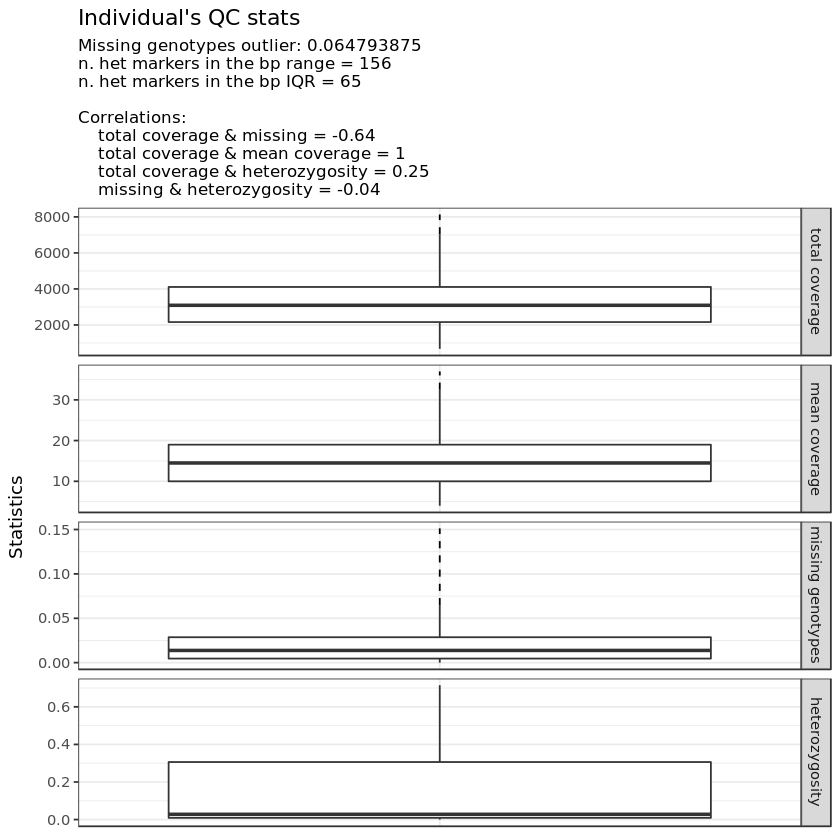

############################## completed read_vcf ##############################


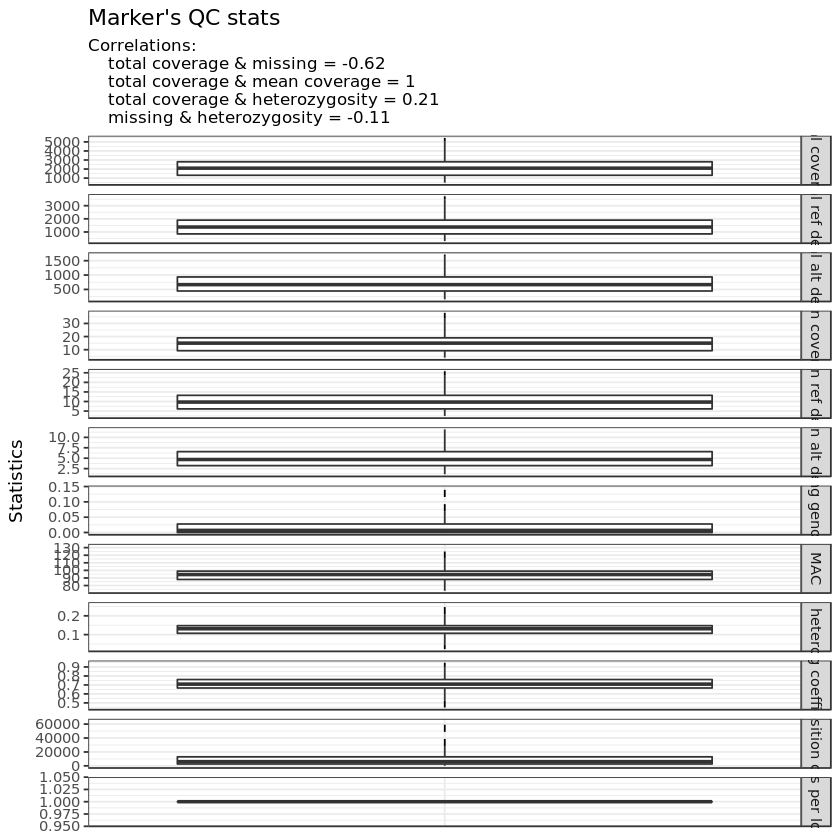

In [16]:
%expand
data = read_vcf("../Analysis/pc12_95-fixed/pc12_95-fixed.recode.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, parallel.core = 4, filter.common.markers = F, pop.levels=c("NB","DB","FL","ILMB") )


In [17]:
outs = genomic_converter(data, strata="../../NFLDB.strata", 
                  output = c("genind","structure"),
                 parallel.core = 4, filename = "pc12_95-fixed",pop.levels=c("NB","DB","FL","ILMB"))

################################################################################
########################## radiator::genomic_converter #########################
################################################################################


Execution date@time: 20191007@1134

Deprecated arguments identified inside "...": 
    pop.levels

Read documentation, for latest changes, and modify your codes!

Folder created: 08_radiator_genomic_converter_20191007@1134
Function call and arguments stored in: radiator_genomic_converter_args_20191007@1134.tsv
Filters parameters file generated: filters_parameters_20191007@1134.tsv

Importing data

Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144

Writing tidy data set:
pc12_95-fixed.rad

Preparing data for output

Data is bi-allelic
Calibrating REF/ALT alleles...
    number of REF/ALT switch = 0
Generating structure file
Generating adegenet genind object


################################### RESULTS ####################################


Data format of input: SeqVarGDSClass
Biallelic data
Number of markers: 218
Number of chromosome/contig/scaffold: 1
Number of strata: 4
Number of individuals: 144

Computation time, overall: 2 sec


######################### genomic_converter completed ##########################


In [18]:
outs$genind

/// GENIND OBJECT /////////

 // 144 individuals; 218 loci; 436 alleles; size: 410.1 Kb

 // Basic content
   @tab:  144 x 436 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 436 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input, write = TRUE)

 // Optional content
   @pop: population of each individual (group size range: 29-44)
   @strata: a data frame with 2 columns ( INDIVIDUALS, POP_ID )

In [19]:
d = outs$genind
save(d, file="../Analysis/pc12_95-fixed/pc12_95-fixed.genind")

## Structure file with pure references


In [3]:
%expand
#don't need
purefile = open("{suffix}../Analysis/Pure_NFLDB.tsv","r")
str_in = open("{suffix}../Analysis/allfiltu/allfiltu_pflag.str","r")
str_out = open("{suffix}../Analysis/allfiltu/allfiltu_pflagPureB.str","w")

keep = []
next(purefile)
next(purefile)
for line in purefile:
    keep.append(line.split("\t")[0])
purefile.close()

str_out.write(str_in.readline())
for line in str_in:
    stuff = line.split("\t")
    if stuff[0] not in keep:
        stuff[2] = "0"
        if stuff[1] == "1":
            stuff[1] = "5"
        if stuff[1] == "2":
            stuff[1] = "6"
        if stuff[1] == "3":
            stuff[1] = "7"
    else:
        stuff[2] = "1"
    str_out.write("\t".join(stuff))

str_in.close()
str_out.close()

In [5]:
%expand
#don't need
purefile = open("{suffix}../Analysis/Pure_NFLDB.tsv","r")
str_in = open("{suffix}../Analysis/pc12_95-fixed/pc12_95-fixed_pflag.str","r")
str_out = open("{suffix}../Analysis/pc12_95-fixed/pc12_95-fixed_pflagPureB.str","w")

keep = []
next(purefile)
next(purefile)
for line in purefile:
    keep.append(line.split("\t")[0])
purefile.close()

str_out.write(str_in.readline())
for line in str_in:
    stuff = line.split("\t")
    if stuff[0] not in keep:
        stuff[2] = "0"
        if stuff[1] == "1":
            stuff[1] = "5"
        if stuff[1] == "2":
            stuff[1] = "6"
        if stuff[1] == "3":
            stuff[1] = "7"
    else:
        stuff[2] = "1"
    str_out.write("\t".join(stuff))

str_in.close()
str_out.close()

In [22]:
%expand
purefile = open("{suffix}../Analysis/Pure_NFLDB.tsv","r")
str_in = open("{suffix}../Analysis/fixed-thinned/fixedu_pflag.str","r")
str_out = open("{suffix}../Analysis/fixed-thinned/fixedu_pflagPure.str","w")

keep = []
next(purefile)
next(purefile)
for line in purefile:
    keep.append(line.split("\t")[0])
purefile.close()

str_out.write(str_in.readline())
for line in str_in:
    stuff = line.split("\t")
    if stuff[0] not in keep:
        stuff[2] = "0"
    else:
        stuff[2] = "1"
    str_out.write("\t".join(stuff))

str_in.close()
str_out.close()

In [6]:
%expand
purefile = open("{suffix}../Analysis/Pure_NFLDB.tsv","r")
str_in = open("{suffix}../Analysis/pc12_95-fixed/pc12_95-fixed_pflag.str","r")
str_out = open("{suffix}../Analysis/pc12_95-fixed/pc12_95-fixed_pflagPure.str","w")

keep = []
next(purefile)
next(purefile)
for line in purefile:
    keep.append(line.split("\t")[0])
purefile.close()

str_out.write(str_in.readline())
for line in str_in:
    stuff = line.split("\t")
    if stuff[0] not in keep:
        stuff[2] = "0"
    else:
        stuff[2] = "1"
    str_out.write("\t".join(stuff))

str_in.close()
str_out.close()

In [21]:
keep

['CANOT-11830',
 'CANOT-11832',
 'CANOT-2617',
 'CANOT11829',
 'CANOT11837',
 'CANOT11838',
 'DB-2592',
 'DB-2593',
 'DB-2637',
 'DB12041',
 'DB2589',
 'DB2590',
 'DB2634',
 'DB2635',
 'SIPS-26',
 'TN11851',
 'TN11855',
 'FL01',
 'FL09',
 'FL12',
 'FL15',
 'FL16',
 'FL20',
 'FL21',
 'FL23',
 'FL30',
 'FL55',
 'FL60',
 'FL64',
 'FL68',
 'FL70',
 'FL71',
 'FL72',
 'FL73',
 'FLAL01',
 'FLAL01II',
 'FLAL02',
 'FLAL02II',
 'FLAL03',
 'FLAL03',
 'FLAL04',
 'FLAL04II',
 'FLF17',
 'FLM10',
 'FLM12',
 'FLM13',
 'FLM15',
 'MATT-01',
 'MATT-02',
 'MATT-06',
 'Mill-18',
 'NB11',
 'NB12',
 'NB13',
 'NB19',
 'NBM01',
 'Otter-13',
 'Otter-4',
 'SL04',
 'SL10',
 'SL11',
 'SL14',
 'SL15',
 'SL16',
 'SL19',
 'SL2',
 'SL8']

## Fixed within all pops

In [84]:
import pandas as pd
infile ="./maf05mac10het8m3R5r5_2/populations.sumstats.tsv"

IN = pd.read_table(infile,header=4)

In [85]:
IN.dtypes

# Locus ID                int64
Chr                       int64
BP                        int64
Col                       int64
Pop ID                   object
P Nuc                    object
Q Nuc                    object
N                         int64
P                       float64
Obs Het                 float64
Obs Hom                 float64
Exp Het                 float64
Exp Hom                 float64
Pi                      float64
Smoothed Pi             float64
Smoothed Pi P-value     float64
Fis                     float64
Smoothed Fis            float64
Smoothed Fis P-value    float64
HWE P-value             float64
Private                   int64
dtype: object

In [110]:
#movies[(movies.duration >= 200) & (movies.genre == 'Drama')]
fixed = IN[((IN['P'] >0.98) | (IN['P'] < 0.02)) & (IN['Pop ID'] != "ILMB")]

In [111]:
fixed

,# Locus ID,Chr,BP,Col,Pop ID,P Nuc,Q Nuc,N,P,Obs Het,...,Exp Het,Exp Hom,Pi,Smoothed Pi,Smoothed Pi P-value,Fis,Smoothed Fis,Smoothed Fis P-value,HWE P-value,Private
5,178,18,2739,90,FL,A,-,29,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
9,179,18,2739,30,FL,T,-,28,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
12,183,18,10128,74,DB,A,-,29,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
14,183,18,10128,74,NB,A,-,40,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
16,185,18,10128,32,DB,T,-,29,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148156,474542,250035,7536,61,NB,G,-,42,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
148158,474566,250036,11247,16,DB,G,-,25,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
148160,474566,250036,11247,16,NB,G,-,39,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
148163,474581,250036,41435,48,FL,C,-,29,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [112]:
check ={}
fix3Loc = []
inds = []
ind_check = []
for row in fixed.itertuples(index=True):
    if (row._1,row.Chr,row.BP) not in check.keys():
        check[(row._1,row.Chr,row.BP)] = 1
    else:
        check[(row._1,row.Chr,row.BP)] += 1
        if check[(row._1,row.Chr,row.BP)] == 3:
            fix3Loc.append((row.Chr,row.BP))

In [113]:
len(fix3Loc)

2824

In [114]:
x = IN[IN[["Chr","BP"]].apply(tuple, 1).isin(fix3Loc)]

In [116]:
%expand
x[["# Locus ID","Chr","BP","Pop ID","N","P"]].to_csv("{suffix}testfixed3.txt",sep="\t", index=False)

In [117]:
%expand
positions = []
OUT = open("{suffix}fixed3.positions","w")
OUTr = open("{suffix}fixed3_R.positions","w")
OUTr.write("LOCUS\tPOS\n")
n=0
for (Chr,BP) in fix3Loc:
    if (Chr, BP) not in positions:
        positions.append((Chr, BP))
        OUT.write(str(Chr)+"\t"+str(BP)+"\n")
        OUTr.write(str(Chr)+"\t"+str(BP)+"\n")
        n+=1
OUT.close()
OUTr.close()
print(n)

2046


### Making inputs in R

In [2]:
getwd()

[1] "/gpfs01/home/kes0132/Delta/Stacks_Assembly/MyStacks"

In [152]:
library("adegenet") # .genind format
library("radiator") # Conversion from vcf to a lot of other formats

ERROR: Error in library("adegenet"): there is no package called 'adegenet'


In [2]:
%expand
setwd("{suffix}")
library(radiator)
library(adegenet)

Loading required package: ade4

   /// adegenet 2.1.1 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()




In [ ]:
%expand
setwd("{suffix}")
data <- radiator::filter_rad(
    data = "./maf05mac4het9m3R50_2/populations.snps.vcf",
    strata = "../../NFLDB.strata", 
    output = c("genind")
    )

In [ ]:
whitelist.markers = "fixed_R.positions",

Execution date@time: 20190926@1205
Folder created: read_vcf_20190926@1205
Function call and arguments stored in: radiator_read_vcf_args_20190926@1205.tsv
File written: random.seed (246505)

Reading VCF
Data summary: 
    number of samples: 144
    number of markers: 4995
done! timing: 3 sec


File written: filtered_20190926@1205.gds

Analyzing the data...
VCF source: Stacks v2.4
Data is bi-allelic
Cleaning VCF's sample names
Synchronizing data and strata...
    Number of strata: 4
    Number of individuals: 144
Reads assembly: de novo
Filters parameters file generated: filters_parameters_20190926@1205.tsv
Filters parameters file: initiated and updated


################################################################################
########################### radiator::filter_monomorphic #######################
################################################################################


Execution date@time: 20190926@1205
Function call and arguments stored in: radiator_filter_monomorphic_args_20190926@1205.tsv
Filters parameters file: initiated
File written: whitelist.polymorphic.markers_20190926@1205.tsv
Filters parameters file: updated


################################### RESULTS ####################################



Filter monomorphic markers
Number of individuals / strata / chrom / locus / SNP:
    Before: 144 / 4 / 1 / 2622 / 4995
    Blacklisted: 0 / 0 / 0 / 0 / 0
    After: 144 / 4 / 1 / 2622 / 4995

Computation time, overall: 0 sec


######################## filter_monomorphic completed ##########################
################################################################################
######################### radiator::filter_genotyping ##########################
################################################################################


Execution date@time: 20190926@1205
Function call and arguments stored in: radiator_filter_genotyping_args_20190926@1205.tsv
Importing data ...
Filters parameters file: initiated
Generating statistics
Generating missingness/genotyping helper table...


ERROR: Error in is_missing(.key): object 'id.select' not found



Computation time, overall: 1 sec


######################## completed filter_genotyping ###########################



Computation time, overall: 4 sec


############################## completed read_vcf ##############################


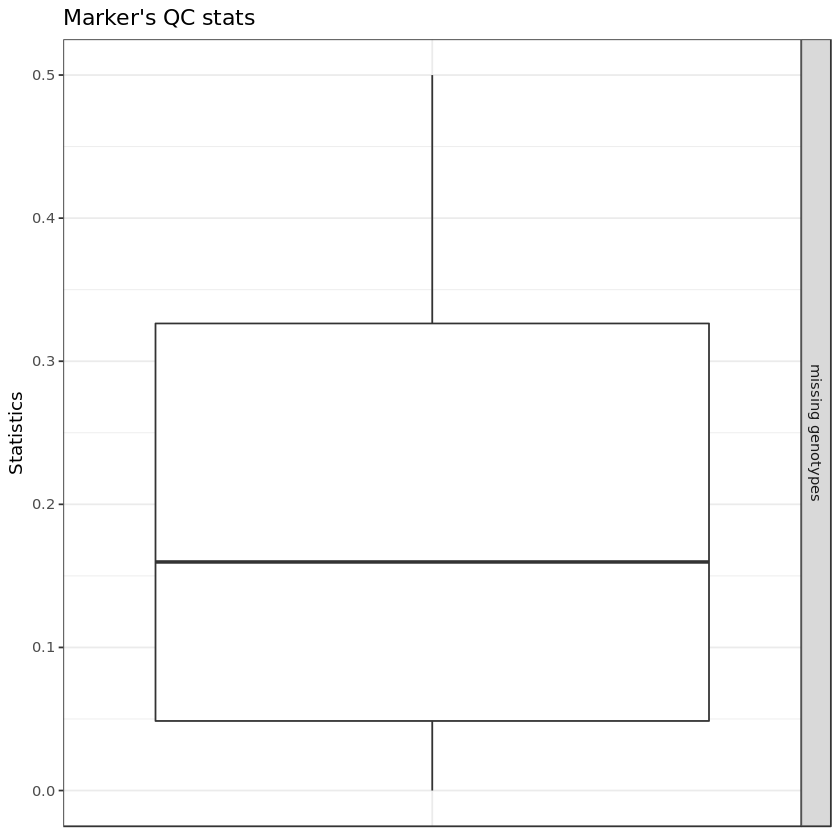

In [11]:
%expand
data = read_vcf("../../Silliman_subset//sub_populations.snps.vcf", strata = "../../NFLDB.strata",
        vcf.stats = TRUE, 
  parallel.core = 4, filter.common.markers = F, filter.genotyping = 15, filename= "filtered")


In [ ]:
dataHW = filter_hwe(data,interactive.filter=F, strata= "../../NFLDB.location.strata"
                   hw.pop.threshold=3, midp.threshold = 1, parallel.core = 4, 
                    filename="filtered_hwe")

In [ ]:
dataHWLD = filter_ld(dataHW, interactive.filter = F, filter.short.ld = "mac",
  filter.long.ld = 0.7, parallel.core = 4, long.ld.missing = TRUE,
  filename = "filtered_hwld")

In [ ]:
genomic_converter(dataHWLD, strata="../../NFLDB.strata", 
                  output = c("genind","structure","vcf"),
                 parallel.core = 4, filename = "hwp3t1ld7")

### Population Structure